In [ ]:
folder_path = 'data'
# !pip install openpyxl

all_dataframes = []

# Parcourir tous les fichiers dans le dossier
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_excel(file_path)
        all_dataframes.append(df)

all_data = pd.concat(all_dataframes, ignore_index=True)

# Opinion assurances - library import

In [208]:
import pandas as pd
import numpy as np
import string
import re
import os

# !pip install pyspellchecker
# from spellchecker import SpellChecker

# !pip install symspellpy
from symspellpy import SymSpell, Verbosity

import nltk
from nltk import FreqDist
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords') 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


from collections import Counter
from multiprocessing import Pool
from IPython.display import display
from tqdm import tqdm

# !pip install spacy
import spacy

# !pip install gensim
import gensim
from gensim import corpora

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# !pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\minji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\minji\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\minji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading BokehJS ...

# Data Import 

In [200]:
all_data = pd.read_csv('data_scrapped_with_company.csv')

# Data info

In [12]:
nan_per_column = all_data.isnull().sum()
nan_per_column

company      17049
stars            0
author           0
date             0
review           1
review_en        1
dtype: int64

In [7]:
all_data

,company,stars,author,date,review,review_en
0,NaN,1,victime,07/08/2022,"Assurance à bannir, 3 ans chez Aviva, j'ai vu ...","Insurance to be banned, 3 years with Aviva, I ..."
1,NaN,1,emma,03/08/2022,J'ai souscrit un perp par l'intermédiaire d'UF...,I took out a perp through UFF with Bee Vie (st...
2,NaN,1,CACO31170,18/07/2022,je ne vous le conseille pas. Depuis janvier 20...,I don't recommend it. Since January 2022 I hav...
3,NaN,2,CLAIRE,13/07/2022,AVIVA devenue ABEILLE ont du mal à régler les ...,AVIVA which became ABEILLE have difficulty set...
4,NaN,1,Emma94,08/07/2022,J'ai fait une demande de rachat d'une assuranc...,I made a request to buy back life insurance on...
...,...,...,...,...,...,...
23583,NaN,4,JEROME H,31/05/2022,"Je suis très satisfait de vos services( Tarif,...","I am very satisfied with your services (price,..."
23584,NaN,4,lara B,31/05/2022,je suis satisfaite du service et des modalités...,I am satisfied with the service and the terms\...
23585,NaN,5,sophie J,31/05/2022,"Je suis à la GMF depuis que j'ai une voiture, ...","I have been at GMF since I had a car, I then t..."
23586,NaN,3,Jean-Paul D,30/05/2022,satisfait des services mais pas du prix sur l'...,satisfied with the services but not with the p...


In [ ]:
all_data[all_data['avis_cor_en'].notnull()][['avis_en','avis_cor_en']]

,avis_en,avis_cor_en
33000,Insurance that puts customers in difficulty. S...,Insurance that puts customers in difficulty. S...
33001,Hello\nMember 3001628. You have sent me a medi...,Hello\nMember 3001628. You have sent me a medi...
33002,I am still waiting for my salary supplement fo...,I am still waiting for my salary supplement fo...
33003,In half treatment the mutual after four reimbu...,In half treatment the mutual after four reimbu...
33004,Notice to colleagues from the territorial publ...,Notice to colleagues from the territorial publ...
...,...,...
33426,Very disappointed with how to proceed with you...,Very disappointed with how to proceed with you...
33427,Pont de Beauvoisin Savoie agency\nIncompetence...,Pont de Beauvoisin Savoie agency\nIncompetence...
33428,hello\nThe assistance is deplorable and the au...,hello\nThe assistance is deplorable and the au...
33429,Hello I subscribed to a damage contract work a...,Hello I subscribed to a damage contract work a...


In [4]:
duplicate_rows = all_data[all_data.duplicated(keep=False)]

In [5]:
duplicate_rows_sorted = duplicate_rows.sort_values(by=list(all_data.columns))

In [6]:
duplicate_rows_sorted

,company,stars,author,date,review,review_en
26218,NaN,1,ALTER EGO,05/11/2020,"Nous avons fait, par erreur, un virement au bé...","We made, by mistake, a transfer to this compan..."
26228,NaN,1,ALTER EGO,05/11/2020,"Nous avons fait, par erreur, un virement au bé...","We made, by mistake, a transfer to this compan..."
26238,NaN,1,ALTER EGO,05/11/2020,"Nous avons fait, par erreur, un virement au bé...","We made, by mistake, a transfer to this compan..."
26248,NaN,1,ALTER EGO,05/11/2020,"Nous avons fait, par erreur, un virement au bé...","We made, by mistake, a transfer to this compan..."
26258,NaN,1,ALTER EGO,05/11/2020,"Nous avons fait, par erreur, un virement au bé...","We made, by mistake, a transfer to this compan..."
...,...,...,...,...,...,...
24689,NaN,5,odile R,12/07/2022,"je suis satisfait de la prise en charge, expli...","I am satisfied with the support, clear explana..."
24723,NaN,5,odile R,12/07/2022,"je suis satisfait de la prise en charge, expli...","I am satisfied with the support, clear explana..."
24757,NaN,5,odile R,12/07/2022,"je suis satisfait de la prise en charge, expli...","I am satisfied with the support, clear explana..."
24791,NaN,5,odile R,12/07/2022,"je suis satisfait de la prise en charge, expli...","I am satisfied with the support, clear explana..."


In [92]:
all_data["company"].value_counts()

company
direct assurance               2000
olivier assurances             1999
gmf                            1995
societe generale assurances    1797
macif                          1444
matmut                         1327
allianz                        1157
axa                            1139
generali                        826
malakoff humanis                571
swiss life                      529
credit mutuel                   514
harmonies mutuelles             489
cnp assurances                  447
caisse d epargne                424
cic                             141
abeille assurances              126
lcl                             112
mutex                            34
Name: count, dtype: int64

# Data Cleaning

In [7]:
# all_data['avis_en'] = all_data['avis_cor_en'].combine_first(all_data['avis_en'])
# all_data['avis'] = all_data['avis_cor'].combine_first(all_data['avis'])

In [8]:
# all_data.drop(['avis_cor', 'avis_cor_en'], axis=1, inplace=True)
# all_data = all_data.dropna(subset=['avis_en'])

In [201]:
all_data['company'] = all_data['company'].str.replace(r'^https://www.opinion-assurances.fr/assureur-', '', regex=True)
all_data['company'] = all_data['company'].str.replace(r'\.html.*$', '', regex=True)
all_data['company'] = all_data['company'].str.replace('-', ' ', regex=True)

In [202]:
all_data = all_data.drop_duplicates()
all_data = all_data.dropna(subset=('review'))

# Data processing new columns

In [203]:
def generate_trigrams(token_list):
    return [' '.join(trigram) for trigram in ngrams(token_list, 3) if len(trigram) == 3]

def preprocess_text(df, text_column):
    # Check for NaN values in the text column and replace them with empty strings
    df[text_column] = df[text_column].fillna("").astype(str)

    # Nettoyage de base du texte
    df[text_column] = df[text_column].str.lower().str.translate(str.maketrans('', '', string.punctuation))

    # Tokenisation
    df['review_en_tokenized'] = df[text_column].apply(word_tokenize)

    # Suppression des stop words
    stop_words = set(stopwords.words('english'))
    symbols = ['“', '”', 'malakoff', 'macif', 'lcl', 'matmut', 'allianz', 'axa', 'mutex', 'swiss', 'generali', 'gmf']
    df['review_en_no_stopwords'] = df['review_en_tokenized'].apply(lambda x: [word for word in x if word not in stop_words and word not in symbols and len(word)>2])

    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    df['review_en_lemmatized'] = df['review_en_no_stopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

    # Création des trigrammes
    df['trigrammes'] = df['review_en_lemmatized'].apply(generate_trigrams)

    return df


all_data = preprocess_text(all_data, 'review_en')

# Trigrammes et TF-IDF

In [204]:
all_data['trigrammes_joined'] = all_data['trigrammes'].apply(lambda x: ' '.join(x))

# Créer un objet TfidfVectorizer
vectorizer = TfidfVectorizer()

# Appliquer TF-IDF aux trigrammes joints
tfidf_matrix = vectorizer.fit_transform(all_data['trigrammes_joined'])

# Visualisation des embeddings

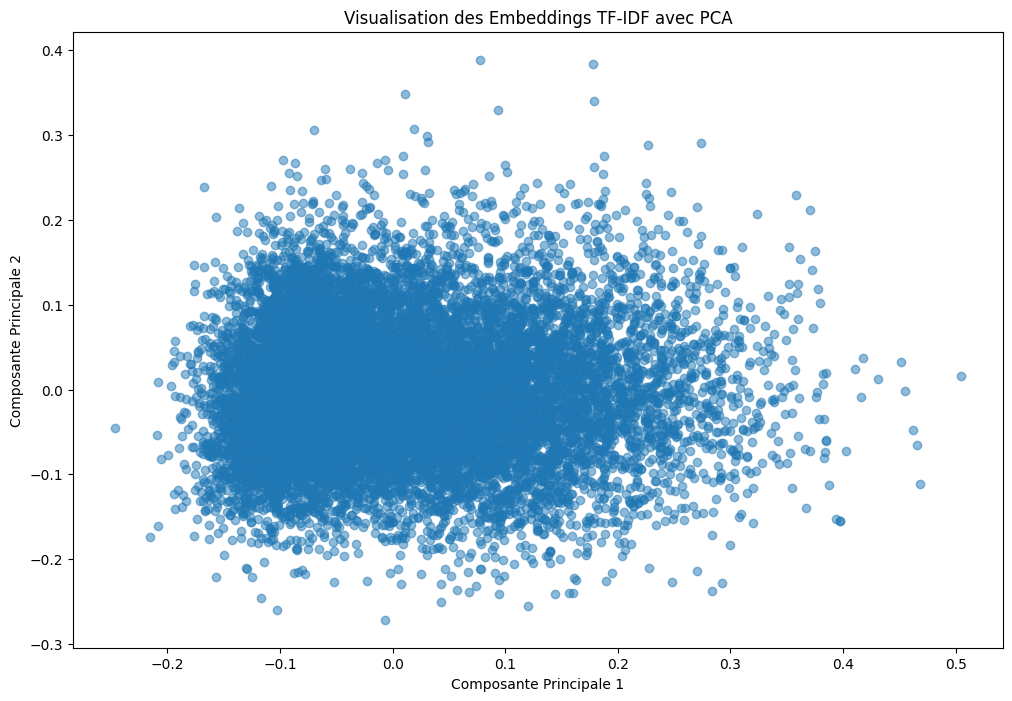

In [209]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5)
plt.title('Visualisation des Embeddings TF-IDF avec PCA')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()

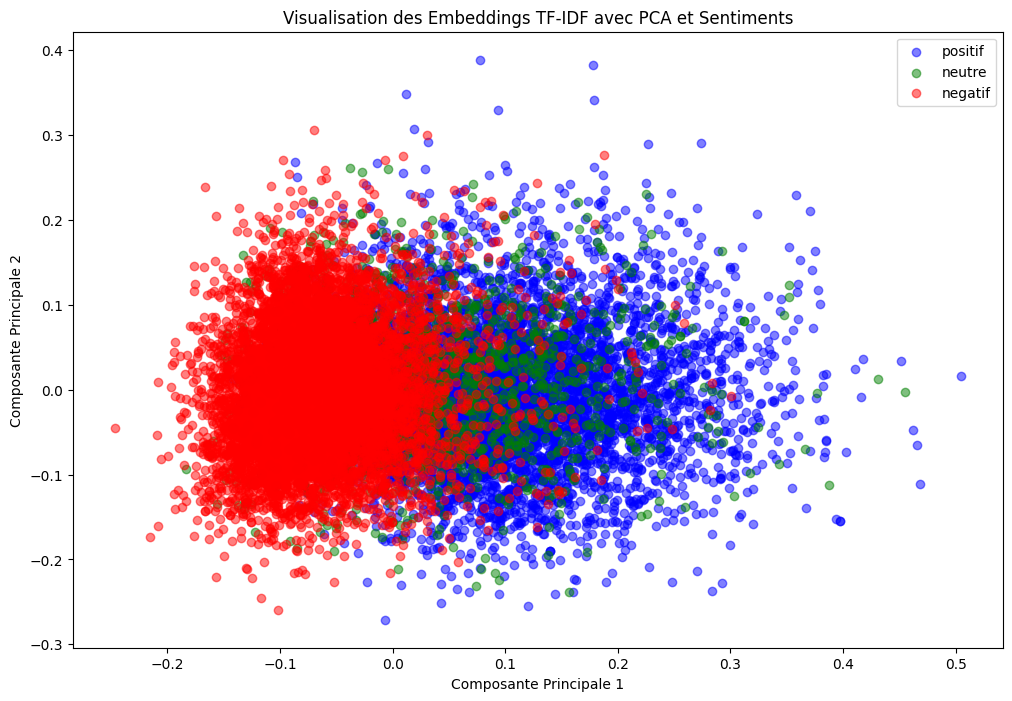

In [210]:
def stars_to_sentiment(number_of_stars):
    if number_of_stars >= 4:  # Supposons que 4 et 5 étoiles sont positifs
        return 'positif'
    elif number_of_stars <= 2:  # Supposons que 1 et 2 étoiles sont négatifs
        return 'negatif'
    else:  # Supposons que 3 étoiles sont neutres
        return 'neutre'

# Appliquez la fonction pour créer une nouvelle colonne 'sentiment'
all_data['sentiment'] = all_data['stars'].apply(stars_to_sentiment)

# Réduction de dimension avec PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(tfidf_matrix.toarray())

# Mapping des couleurs aux sentiments
color_map = {'positif': 'blue', 'negatif': 'red', 'neutre': 'green'}

# Visualisation avec Matplotlib
plt.figure(figsize=(12, 8))
for sentiment in ['positif', 'neutre', 'negatif']:
    indices = all_data['sentiment'] == sentiment
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1],
                alpha=0.5, c=color_map[sentiment], label=sentiment)
plt.title('Visualisation des Embeddings TF-IDF avec PCA et Sentiments')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend()
plt.show()

# Spellchecker

In [10]:
all_data.value_counts()

company  stars  author   date        review                                                review_en                                                
MACIF    1      anonyme  02/06/2021  Intervention supprimée à la demande de l'internaute.  Intervention deleted at the request of the Internet user.    1
                         21/02/2020  Intervention supprimée à la demande de l'internaute.  Intervention deleted at the request of the Internet user.    1
Name: count, dtype: int64

In [6]:
nltk.download('stopwords')
stop_words_fr = set(stopwords.words('french'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
words = all_data['review'].str.split()

In [13]:
words = words.apply(lambda x: [item for item in x if item not in stop_words_fr])
frequent_words = Counter([word for sublist in words for word in sublist])
frequent_words.most_common(10)

[('a', 17017),
 ('Je', 14818),
 ('très', 11185),
 ('plus', 10750),
 ('assurance', 9154),
 ("j'ai", 7892),
 ('prix', 7298),
 ('service', 7129),
 ('bien', 6277),
 ('!', 6143)]

In [8]:
# Initialisation de SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = "fr-100k.txt"  # Remplacez par le chemin vers votre dictionnaire français
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

True

In [9]:
# Liste des stopwords en français
stop_words = set(stopwords.words('french'))

# Fonction pour le prétraitement du texte
def preprocess_text(text):
    # Suppression des caractères spéciaux et de la ponctuation
    text = re.sub(r'\W', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Suppression des stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

# Fonction pour corriger l'orthographe
def spell_check(text):
    text = preprocess_text(text)
    suggestions = sym_spell.lookup_compound(text, max_edit_distance=2)
    return suggestions[0].term

In [10]:
# Création d'un pool de processus
with Pool(processes=4) as pool:  # Utilise 4 processus
    all_data['review_spellcheck'] = pool.map(spell_check, all_data['review'])

# Word frequency

In [191]:
def freq_words(x, terms = 30):
  all_words = []
  for text in x:
    all_words.extend(text)
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
  plt.show()

C:\Users\minji\AppData\Local\Temp\ipykernel_23224\3644089223.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


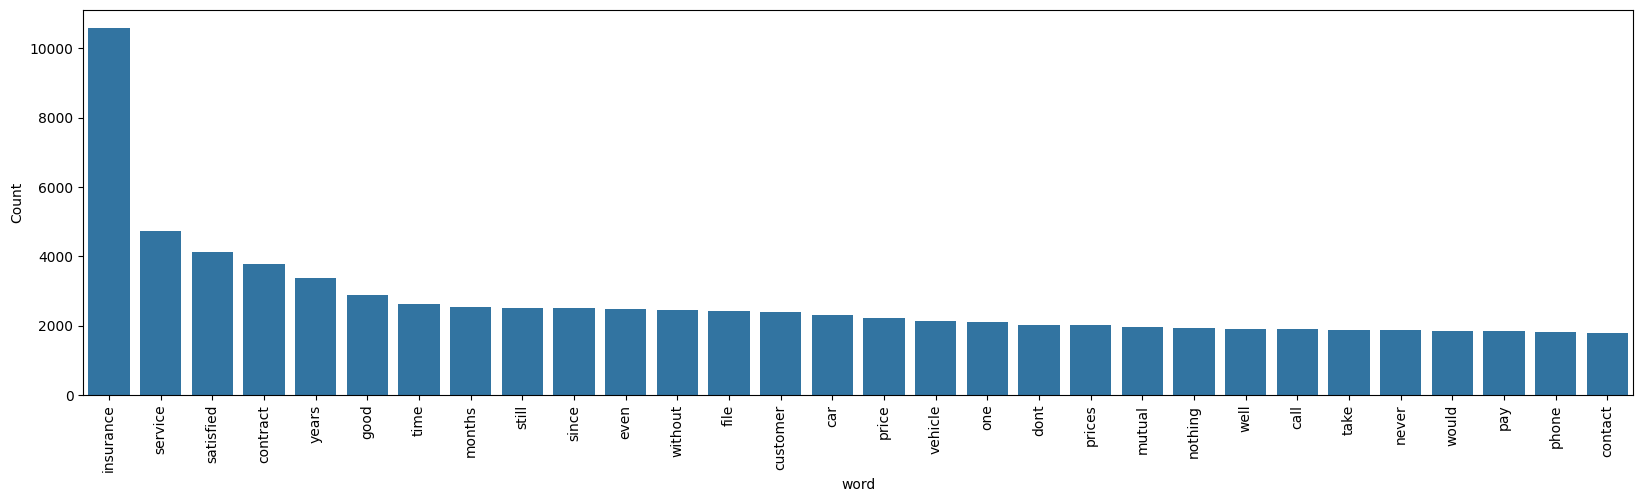

In [175]:
freq_words(all_data['review_en_no_stopwords'])

# Topic modeling

In [192]:
# !python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

C:\Users\minji\AppData\Local\Temp\ipykernel_23224\3644089223.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


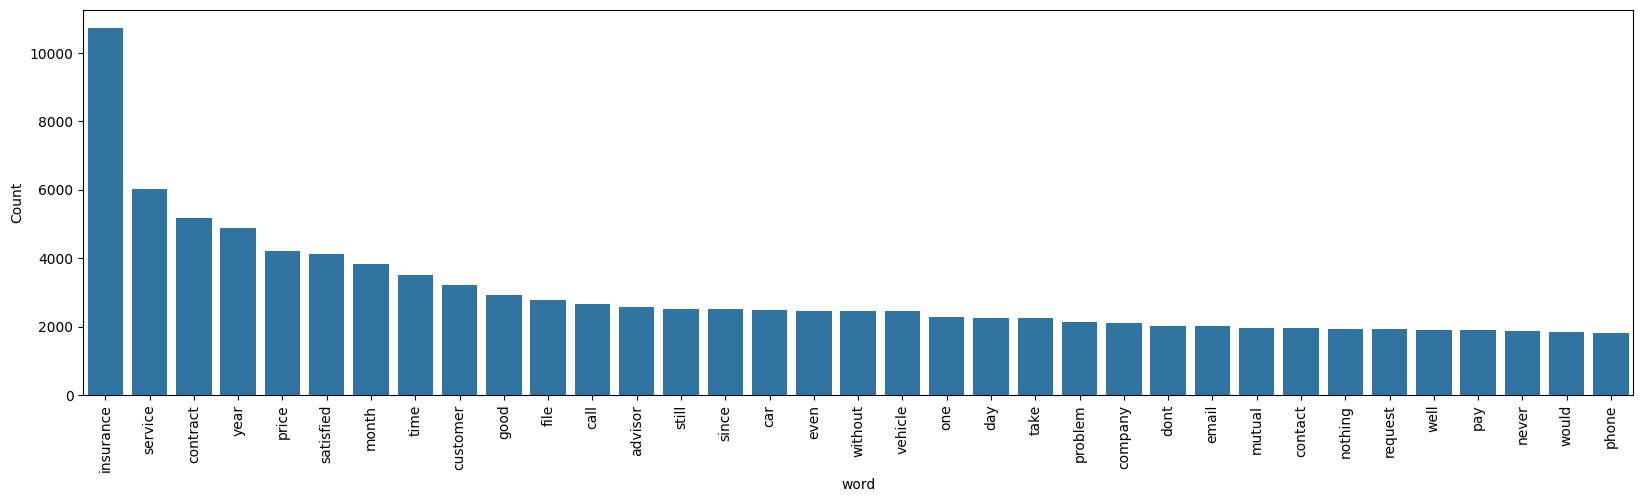

In [193]:
reviews = freq_words(all_data['review_en_lemmatized'], 35)

In [194]:
reviews = [words for words in all_data["review_en_lemmatized"].tolist()]

In [195]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(reviews)
# Convert list of reviews (reviews_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=7, 
                random_state=100,
                chunksize=1000,
                passes=50)

In [196]:
lda_model.print_topics()

[(0,
  '0.043*"price" + 0.026*"vehicle" + 0.025*"suit" + 0.024*"expensive" + 0.023*"compared" + 0.019*"1996" + 0.014*"little" + 0.013*"driver" + 0.013*"commercial" + 0.012*"car"'),
 (1,
  '0.055*"service" + 0.052*"satisfied" + 0.038*"price" + 0.023*"insurance" + 0.022*"good" + 0.016*"advisor" + 0.015*"recommend" + 0.013*"customer" + 0.013*"well" + 0.011*"thank"'),
 (2,
  '0.015*"insurance" + 0.013*"call" + 0.012*"dont" + 0.012*"time" + 0.012*"vehicle" + 0.010*"day" + 0.009*"car" + 0.009*"one" + 0.009*"take" + 0.008*"phone"'),
 (3,
  '0.018*"document" + 0.017*"month" + 0.016*"file" + 0.016*"email" + 0.015*"since" + 0.013*"request" + 0.013*"received" + 0.012*"still" + 0.012*"sent" + 0.012*"time"'),
 (4,
  '0.038*"mutual" + 0.026*"reimbursement" + 0.016*"humanis" + 0.014*"pension" + 0.011*"company" + 0.010*"health" + 0.010*"file" + 0.007*"since" + 0.007*"year" + 0.007*"time"'),
 (5,
  '0.038*"expert" + 0.037*"damage" + 0.021*"water" + 0.018*"work" + 0.013*"report" + 0.012*"following" + 0.

In [197]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.087854 -0.020235       1        1  23.393705
2      0.132610  0.026735       2        1  22.903806
3      0.182891  0.064639       3        1  19.595714
1      0.074546 -0.169571       4        1  15.895677
4      0.105616  0.082842       5        1  10.261317
5     -0.302048  0.258036       6        1   4.626662
0     -0.281469 -0.242447       7        1   3.323119, topic_info=          Term         Freq        Total Category  logprob  loglift
351  satisfied  4329.000000  4329.000000  Default  30.0000  30.0000
572      price  3905.000000  3905.000000  Default  29.0000  29.0000
132    service  6127.000000  6127.000000  Default  28.0000  28.0000
774     mutual  2055.000000  2055.000000  Default  27.0000  27.0000
50     vehicle  1869.000000  1869.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
157        car   207.259803  2014.221734   Topic7  -4.4302   1.1303
509        new   132.192296   916.693726   Topic7  -4.8799   1.4678
901     option    95.724102   386.075410   Topic7  -5.2027   2.0097
26     insured   105.067333  1464.932606   Topic7  -5.1096   0.7693
334      think    90.010862   663.668974   Topic7  -5.2643   1.4064

[456 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
3805       7  0.996106   1996
2609       5  0.991341   2010
1402       1  0.088467   2020
1402       3  0.591948   2020
1402       5  0.291420   2020
...      ...       ...    ...
52         5  0.080199   year
52         7  0.011696   year
53         7  0.996770  young
16361      3  0.987388   €690
4301       5  0.987916   €850

[745 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 4, 2, 5, 6, 1])

In [199]:
# Extract topics from lda_model
topics = lda_model.print_topics()

def name_topics(topics, num_words=3):
    topic_names = []
    for topic in topics:
        # Extract words from each topic string
        words = re.findall(r'"([^"]*)"', topic[1])
        # Use the top num_words words to name the topic
        topic_names.append('_'.join(words[:num_words]))
    return topic_names

# Use the function
topic_names = name_topics(topics)
for i, name in enumerate(topic_names):
    print(f"Topic {i+1}: {name}")

Topic 1: price_vehicle_suit
Topic 2: service_satisfied_price
Topic 3: insurance_call_dont
Topic 4: document_month_file
Topic 5: mutual_reimbursement_humanis
Topic 6: expert_damage_water
Topic 7: insurance_year_contract
